In [6]:
import warnings
import numpy as np 
import pandas as pd 
import os #path to file

#ploting data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


sns.set(style='darkgrid', font='sans-serif', font_scale=1)

#Handling warnings
warnings.filterwarnings("ignore")

In [7]:
#select the training and test paths.

train_path = "train.csv"
test_path = "test.csv"

In [8]:
# Read Train File
train_df = pd.read_csv(train_path)

#Explore first 5 rows
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#Read test file
test_df = pd.read_csv(test_path)

#Explore first 5 rows
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
# Basic info about dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# Stats summary
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# Since we don't need ID column, so we drop it in both the datasets.
train_df.drop(labels='Loan_ID', axis=1, inplace=True)
test_df.drop(labels="Loan_ID", axis=1, inplace=True)

#Explore random 10 rows
train_df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
216,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
396,Female,No,0,Graduate,No,3180,0.0,71.0,360.0,0.0,Urban,N
299,Male,Yes,1,Graduate,No,2014,2925.0,113.0,360.0,1.0,Urban,N
26,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
429,Male,No,0,Not Graduate,No,2717,0.0,60.0,180.0,1.0,Urban,Y
300,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban,N
39,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
591,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
318,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban,Y
583,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N


In [13]:
##Count Missing Value 
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Handle the missing values

IMPUTATION: filling data with meaning full estimate
DELETION: Remove rows or columns with missing values
Imputation choice for following datasets

MODE: mode is used to fill datapoint of Binary and Categorical variables

 **Binary Variables** : Credit_History, Self_Employed, Gender, Married

 **Categorical Variables** : Dependents
MEAN : mean is used to fill datapoint in Numerical Variable

 **Numerical Variables** : LoanAmount, Loan_Amount_Term

In [14]:
# Checking unique variables and dtypes in Credit_History
print(f"Unique vaiables: {train_df['Credit_History'].unique()} \n\ndtype of Credit_History: {train_df['Credit_History'].dtype}")

Unique vaiables: [ 1.  0. nan] 

dtype of Credit_History: float64


The dtype of Credit_History is a number, but the datapoints are categorical, we are going to change the dtype to object.

In [15]:
# Convert the Credit_History column to the object datatype
train_df['Credit_History'] = train_df['Credit_History'].astype('object')
train_df['Credit_History'].dtype

dtype('O')

In [16]:
# List of columns with missing values
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

# Imputation loop
for col in null_cols:
    if train_df[col].dtype == 'object':
        # Impute categorical variables with mode
        mode_value = train_df[col].mode()[0]
        train_df[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")
    else:
        # Impute numerical variables with mean for non-binary, and mode for binary
        mean_value = train_df[col].mean()
        train_df[col].fillna(mean_value, inplace=True)
        print(f"Imputed {col} with mean: {mean_value}")

Imputed Credit_History with mode: 1.0
Imputed Self_Employed with mode: No
Imputed LoanAmount with mean: 146.41216216216216
Imputed Dependents with mode: 0
Imputed Loan_Amount_Term with mean: 342.0
Imputed Gender with mode: Male
Imputed Married with mode: Yes


In [17]:
# Count Null v
train_df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

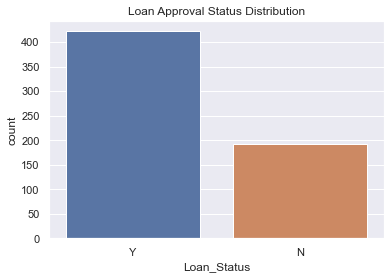

In [18]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Loan Approval Status Distribution')
plt.show()

In [19]:
# Lets distribute our datatype into numerical and categorical datatype

numerical = train_df.select_dtypes('number').columns.to_list()
categorical = train_df.select_dtypes('object').columns.to_list()

loan_num = train_df[numerical]
loan_cat = train_df[categorical]

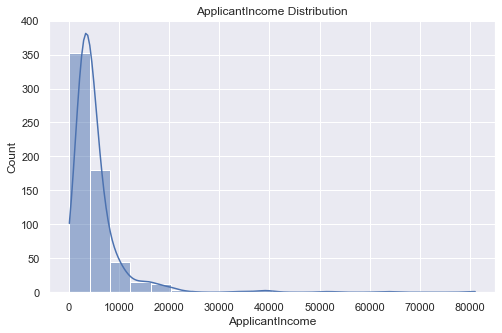

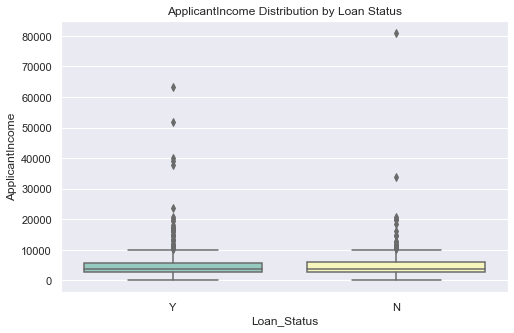

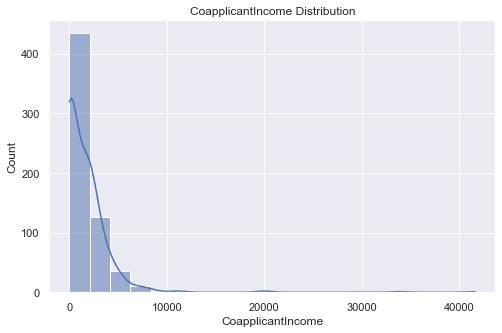

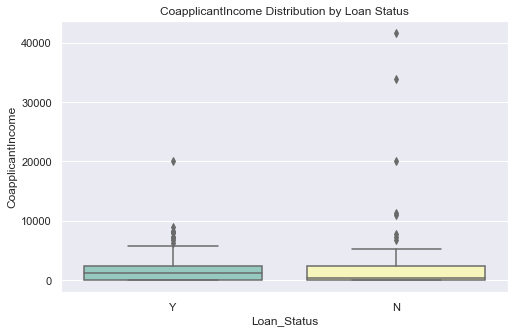

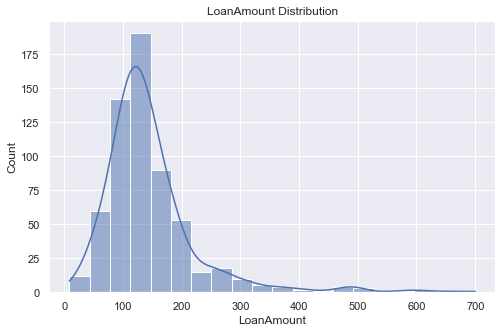

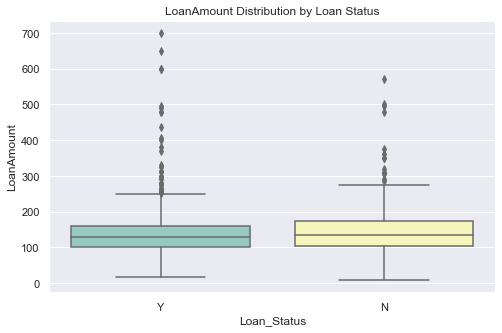

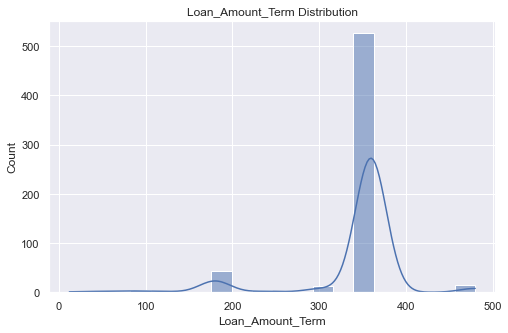

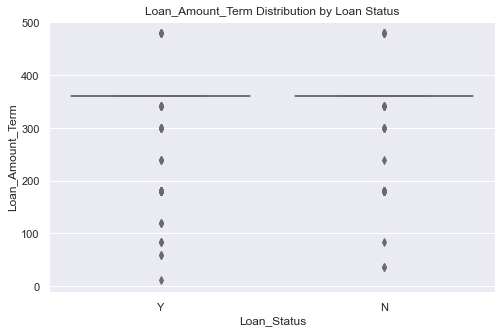

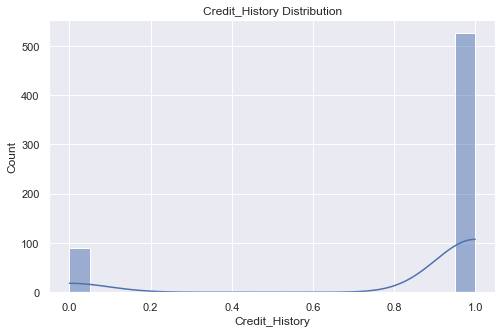

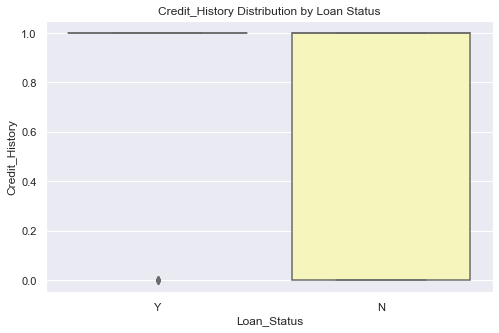

In [20]:
# Visualizing Distplot on numerical columns
for i in loan_num:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[i], bins=20, kde=True)
    plt.title(f'{i} Distribution')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Loan_Status', y=i, data=train_df, palette='Set3')
    plt.title(f'{i} Distribution by Loan Status')
    plt.show()


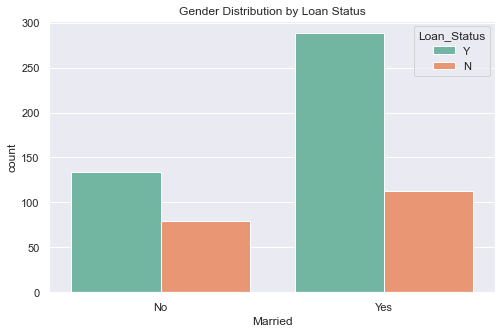

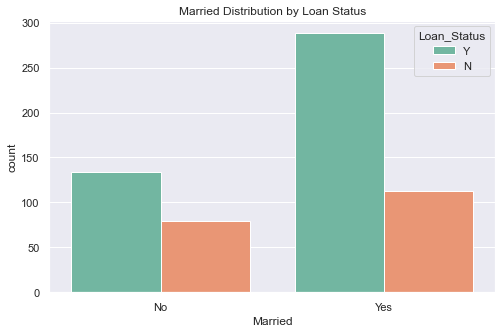

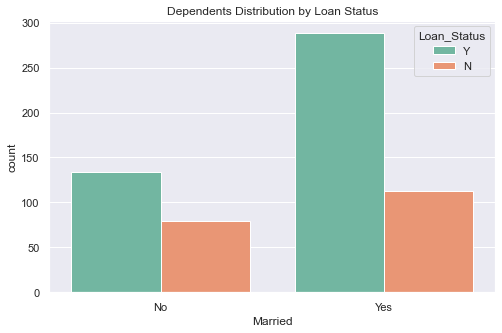

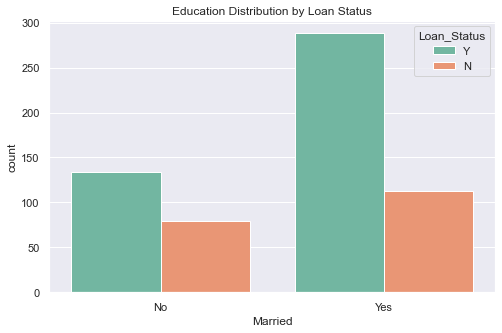

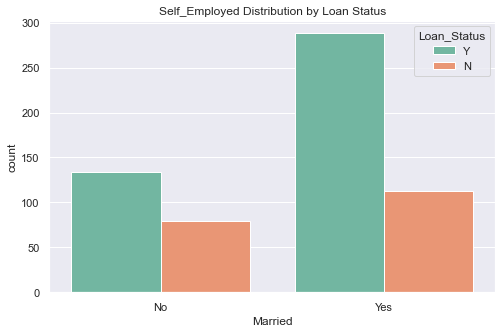

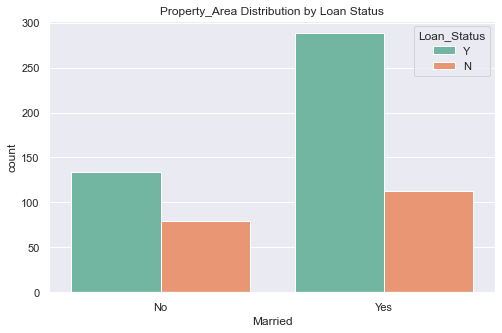

In [21]:
for i in categorical[:-1]: #excluding the last element since it is Loan_Status itself
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Loan_Status', data=train_df, palette='Set2')
    plt.title(f'{i} Distribution by Loan Status')
    plt.show()

In [22]:
#Mapping Categorical values

label_mapping = {'Male': 1, 'Female': 0,
'Yes': 1, 'No': 0,
'0': 0, '1': 1, '2': 2, '3+': 3 ,
'Graduate': 1, 'Not Graduate': 0,
'Urban': 1, 'Semiurban': 2,'Rural': 3,
'Y': 1, 'N': 0}

# Apply label encoding to categorical columns 
train_df.replace(label_mapping, inplace=True)
test_df.replace(label_mapping, inplace=True)

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------        

CORRELATION MATRIX

The values range from -1 to 1, where:

1 -> positive correlation, -1 -> negative correlation, 0 -> no correlation.

In [23]:
# Creating a correlation between the training dataset
corr_matrix = train_df.corr()
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,-0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,-0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,-0.001963,0.540556


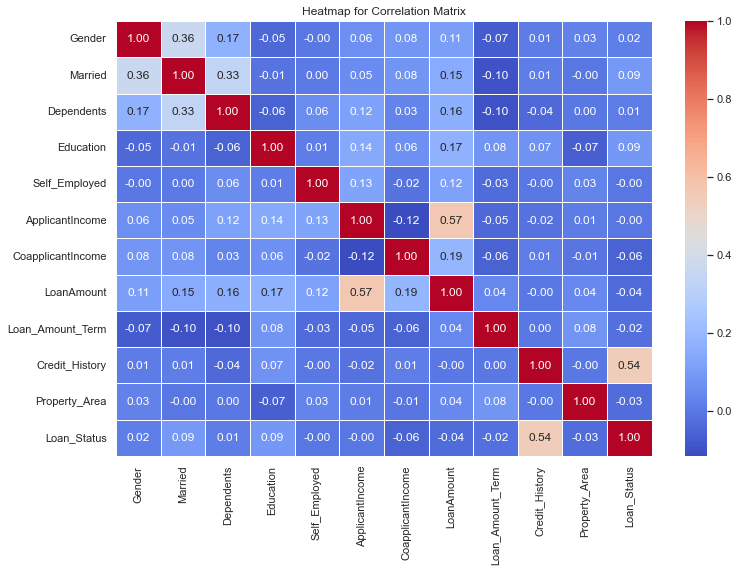

In [24]:
# Plotting Heatmap for better visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Heatmap for Correlation Matrix")
plt.show()

MODEL CREATION

Now we need to split our training dataset into imput feature and target value.

Models to be used:

1. Logistic Regression
2. Decision Tree
3. Random Forest

In [25]:
# Split training data 
y = train_df['Loan_Status']
x = train_df.drop('Loan_Status', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [26]:
# Data Scaling 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.44908871, -1.4918324 , -0.77893618, ...,  0.29472136,
         0.42640143,  1.32720844],
       [ 0.44908871,  0.67031659, -0.77893618, ..., -2.63881605,
         0.42640143,  1.32720844],
       [ 0.44908871,  0.67031659, -0.77893618, ...,  0.29472136,
         0.42640143,  0.06193639],
       ...,
       [ 0.44908871,  0.67031659,  2.15232366, ...,  0.29472136,
         0.42640143,  0.06193639],
       [ 0.44908871,  0.67031659, -0.77893618, ...,  0.29472136,
         0.42640143, -1.20333566],
       [-2.22673154,  0.67031659, -0.77893618, ...,  0.29472136,
         0.42640143,  0.06193639]])

LOGISTIC REGRESSION

In [29]:
# Model Training with GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
LR = LogisticRegression(random_state=42)
grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Model Prediction
y_pred = grid_search.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Best Parameters: {'C': 0.01, 'penalty': 'l2'}

Accuracy: 0.827027027027027

Confusion Matrix:
[[ 21  30]
 [  2 132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [28]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Logistic_Regression.to_csv("Logistic Regression.csv")  

DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Training with GridSearchCV
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

dt = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)

# Model Prediction
dt_y_pred = dt_grid_search.predict(x_test)

# Model Evaluation
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_classification_rep = classification_report(y_test, dt_y_pred)

print("\nDecision Tree Model:")
print(f"Accuracy: {dt_accuracy}")
print("\nConfusion Matrix:")
print(dt_conf_matrix)
print("\nClassification Report:")
print(dt_classification_rep)


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Decision Tree Model:
Accuracy: 0.654054054054054

Confusion Matrix:
[[ 19  32]
 [ 32 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.37      0.37        51
           1       0.76      0.76      0.76       134

    accuracy                           0.65       185
   macro avg       0.57      0.57      0.57       185
weighted avg       0.65      0.65      0.65       185



In [32]:
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Decision_Tree.to_csv("Decision Tree.csv")  

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Model Training with GridSearchCV
rf_param_grid = {'n_estimators': [10, 50, 100, 200], 'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("\nBest Parameters for Random Forest:", rf_grid_search.best_params_)

# Model Prediction
rf_y_pred = rf_grid_search.predict(x_test)

# Model Evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_classification_rep = classification_report(y_test, rf_y_pred)

print("\nRandom Forest Model:")
print(f"Accuracy: {rf_accuracy}")
print("\nConfusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(rf_classification_rep)



Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Random Forest Model:
Accuracy: 0.8108108108108109

Confusion Matrix:
[[ 21  30]
 [  5 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.41      0.55        51
           1       0.81      0.96      0.88       134

    accuracy                           0.81       185
   macro avg       0.81      0.69      0.71       185
weighted avg       0.81      0.81      0.79       185



In [33]:
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Random_Forest.to_csv("Random Forest.csv")  